# Analysis and Visualization of E3SM Data using UXarray (Experimental)

E3SM Tutorial Workshop 2024

05/07/2024

Authors: [Tom Vo](https://github.com/tomvothecoder) and [Stephen Po-Chedley](https://github.com/pochedls)


## Overview

This exercise notebook will walk you through the core UXarray data models and a few
analysis and visualization features to help you gain practical hands-on experience. Please visit the [UXarray documentation](https://uxarray.readthedocs.io/en/stable/) for more information on all of the available features.

**Please note, UXarray is actively being developed with new features and capabilities,
hence it is an "experimental" notebook.**

### Exercises

1. Open E3SM Data with Grid Files
2. View Grid Information
3. Visualize Grid Topology
4. Face Area Calculations
5. Visualize data as polygons
6. Interoperability with xCDAT

### Helpful Prequisite Knowledge

If you are unfamiliar and interested in the topics below, click the links for
more information.

- [Differences between structured and unstructured grids](https://github.com/ProjectPythia/unstructured-grid-viz-cookbook/blob/main/notebooks/01-intro/01-unstructured-grid-overview.ipynb)
- [Data Mapping](https://github.com/ProjectPythia/unstructured-grid-viz-cookbook/blob/main/notebooks/01-intro/03-data-mapping.ipynb)
- [Plotting Libraries](https://github.com/ProjectPythia/unstructured-grid-viz-cookbook/blob/main/notebooks/02-methods/01-plotting-libraries.ipynb)
- [Rendering Techniques](https://github.com/ProjectPythia/unstructured-grid-viz-cookbook/blob/main/notebooks/02-methods/02-rendering-techniques.ipynb)

### Resources

- [UXarray Documentation](https://uxarray.readthedocs.io/en/stable/)
- This notebook was adapted from the [UXarray Usage Examples](https://uxarray.readthedocs.io/en/stable/examples.html) and the [Project Pythia Notebooks](https://projectpythia.org/unstructured-grid-viz-cookbook/README.html).


## Prerequisite: Set up the E3SM Unified Environment v1.10.0 Python Kernel

_Skip this section if you've already done it_

1. Open a terminal in Jupyter Hub.
2. Run the commands below to add the kernel to NERSC Jupyter Hub.

   ```bash
   source /global/common/software/e3sm/anaconda_envs/load_latest_e3sm_unified_pm-cpu.sh

   python -m ipykernel install \
   --user --name e3sm_unified_1.10.0 --display-name e3sm_unified.1.10.0
   ```

   &mdash; <cite>https://docs.nersc.gov/services/jupyter/how-to-guides/#how-to-use-a-conda-environment-as-a-python-kernel</cite>

3. Select the kernel for this Notebook by clicking the current kernel in the top-right
   (where it says NERSC Python in the screenshot).

   <img src="kernel-instructions-1.png" width=500px/>

4. Select `e3sm_unified.1.10.0` from the list of environments.

   <img src="kernel-instructions-2.png" width=500px/>


## Setup Code


In [15]:
import glob

import numpy as np
import xarray as xr
import uxarray as ux

# The data directory containing the NetCDF files.
data_dir = "/global/cfs/cdirs/e3sm/www/Tutorials/2024/simulations/extendedOutput.v3.LR.historical_0101/archive/atm/hist/*.h0.*.nc"

# The absolute paths to each NetCDF file in the data directory.
data_paths = glob.glob(data_dir)

# The path to the grid file.
grid_path = "/global/cfs/cdirs/e3sm/diagnostics/grids/ne30pg2.nc"

## What are `ux.Dataset`, `ux.DataArray`, and `ux.Grid` objects?

- A [ux.UxDataset](https://uxarray.readthedocs.io/en/stable/user_api/generated/uxarray.UxDataset.html#uxarray.UxDataset) object is an `xarray.Dataset-like`, multi-dimensional, in memory, array database. This object inherits from `xarray.Dataset` and has its own unstructured grid-aware dataset operators and attributes through the `uxgrid` accessor.
- A [ux.UxDataArray](https://uxarray.readthedocs.io/en/stable/user_api/generated/uxarray.UxDataArray.html) object is an N-dimensional `xarray.DataArray-like` array. It inherits from `xarray.DataArray` and has its own unstructured grid-aware array operators and attributes through the `uxgrid` accessor.
- A [ux.Grid](https://uxarray.readthedocs.io/en/stable/user_api/generated/uxarray.Grid.html#) object represents a two-dimensional unstructured grid encoded following the UGRID conventions and provides grid-specific functionality.
  - Can be used standalone to work with unstructured grids, or can be paired with either a `ux.UxDataArray` or `ux.UxDataset` and accessed through the `.uxgrid` attribute.
  - For constructing a grid from non-UGRID datasets or other types of supported data, see our `ux.open_grid` method or specific class methods (`Grid.from_dataset`, `Grid.from_face_verticies`, etc.)


### Exercise 1. Open E3SM Dataset with Grid Files using UXarray

When working with Unstructured Grids, the grid definition and data variables are often stored as separate files. This means that there are multiple separate files that need to be read and linked together to represent the entire dataset.


#### 💻 Your turn:

Use `ux.open_mfdataset()` to open the grid file and the NetCDF files as a `ux.Dataset` object.

- Documentation: https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.open_mfdataset.html
- Hint: Use `grid_path` and `data_paths` as function arguments.


In [16]:
# Your code here. When ready, click on the three dots below for the solution.

In [17]:
uxds = ux.open_mfdataset(grid_path, data_paths[0:1])

#### 💻 Your turn:

Access the `TREFHT` variable by indexing the `UxDataset` object to obtain a `UxDataArray` object.


In [18]:
# Your code here. When ready, click on the three dots below for the solution.

In [19]:
uxds["TREFHT"]

<xarray.UxDataArray 'TREFHT' (time: 1, n_face: 21600)> Size: 86kB
dask.array<open_dataset-TREFHT, shape=(1, 21600), dtype=float32, chunksize=(1, 21600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 8B 1.095e+03
Dimensions without coordinates: n_face
Attributes:
    units:          K
    long_name:      Reference height temperature
    standard_name:  air_temperature
    cell_methods:   time: mean

### Exercise 2: Viewing Grid Information


#### 💻 Your turn:

View the grid information stored in `uxds` through the `uxgrid` attribute.

- Documentation: https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.UxDataset.uxgrid.html


In [20]:
# Your code here. When ready, click on the three dots below for the solution.

In [21]:
grid = uxds.uxgrid
grid

<uxarray.Grid>
Original Grid Type: Scrip
Grid Dimensions:
  * n_node: 21727
  * grid_size: 21600
  * n_face: 21600
  * n_max_face_nodes: 4
  * n_edge: 43326
  * Two: 2
  * n_nodes_per_face: (21600,)
Grid Coordinates (Spherical):
  * node_lon: (21727,)
  * node_lat: (21727,)
  * face_lon: (21600,)
  * face_lat: (21600,)
Grid Coordinates (Cartesian):
Grid Connectivity Variables:
  * face_node_connectivity: (21600, 4)
  * edge_node_connectivity: (43326, 2)

#### Grid Attributes

If our input grid contained additional attributes that were not representable by the UGRID conventions, they would be stored here.

 <div class="alert alert-block alert-info">
    <b>Info:</b>There are no exercises here, just run the cells.
</div>


In [22]:
grid.parsed_attrs

{}

#### Grid Coordinates

The coordinates by default are represented in terms of longitude and latitude.

 <div class="alert alert-block alert-info">
    <b>Info:</b>There are no exercises here, just run the cells.
</div>

Documentation:

- https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.Grid.node_lon.html
- https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.Grid.node_lat.html


In [23]:
grid.node_lon

<xarray.DataArray 'node_lon' (n_node: 21727)> Size: 174kB
array([0., 0., 0., ..., 0., 0., 0.])
Dimensions without coordinates: n_node

In [24]:
grid.node_lat

<xarray.DataArray 'node_lat' (n_node: 21727)> Size: 174kB
array([-88.5, -87. , -85.5, ...,  85.5,  87. ,  88.5])
Dimensions without coordinates: n_node
Attributes:
    standard_name:  latitude
    long_name:      latitude of mesh nodes
    units:          degrees_north

If you wish to use the Cartesian coordinate system, you can access the following attributes, which will internally construct a set of Cartesian coordinates derived from the previous set.

Documentation:

- https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.Grid.node_x.html
- https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.Grid.node_y.html
- https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.Grid.node_z.html


In [25]:
grid.node_x

<xarray.DataArray 'node_x' (n_node: 21727)> Size: 174kB
array([0.02617695, 0.05233596, 0.0784591 , ..., 0.0784591 , 0.05233596,
       0.02617695])
Dimensions without coordinates: n_node
Attributes:
    standard_name:  cartesian x
    units:          m

In [26]:
grid.node_y

<xarray.DataArray 'node_y' (n_node: 21727)> Size: 174kB
array([0., 0., 0., ..., 0., 0., 0.])
Dimensions without coordinates: n_node
Attributes:
    standard_name:  cartesian y
    units:          m

In [27]:
grid.node_z

<xarray.DataArray 'node_z' (n_node: 21727)> Size: 174kB
array([-0.99965732, -0.99862953, -0.99691733, ...,  0.99691733,
        0.99862953,  0.99965732])
Dimensions without coordinates: n_node
Attributes:
    standard_name:  cartesian z
    units:          m

#### Grid Connectivity

Connectivity variables are used to describe how various geometric elements (nodes, faces, edges) can be manipulated and interconnected to represent the topology of the unstructured grid.

As described in the UGRID conventions, these connectivity variables are stored as integer arrays and may contain a Fill Value. UXarray standardizes both of these at the data loading step, meaning that the data type and fill value can always be guaranteed to be the following:

 <div class="alert alert-block alert-info">
    <b>Info:</b>There are no exercises here, just run the cells.
</div>


In [28]:
ux.INT_DTYPE

numpy.int64

In [29]:
ux.INT_FILL_VALUE

-9223372036854775808

Below we can see how to access these connectivity variables.


In [30]:
grid.face_node_connectivity

<xarray.DataArray 'face_node_connectivity' (n_face: 21600, n_max_face_nodes: 4)> Size: 691kB
array([[18937, 19027, 19029, 18938],
       [19027, 19127, 19128, 19029],
       [18938, 19029, 19031, 18939],
       ...,
       [ 8038,  8002,  8101,  8192],
       [ 8287,  8192,  8224,  8382],
       [ 8192,  8101,  8191,  8224]])
Dimensions without coordinates: n_face, n_max_face_nodes
Attributes:
    cf_role:      face_node_connectivity
    _FillValue:   -9223372036854775808
    start_index:  0

In [31]:
grid.n_nodes_per_face

<xarray.DataArray 'n_nodes_per_face' (n_face: 21600)> Size: 173kB
array([4, 4, 4, ..., 4, 4, 4])
Dimensions without coordinates: n_face
Attributes:
    long_name:  number of non-fill value nodes for each face

### Exercise 3: Visualize the Grid Topology


#### Using the `Grid.plot()` Accessor

Each Grid object is initialized with a plotting accessor, which enables plotting routines to be called directly on the object. By default, calling `.plot()` on a `Grid` instance plots all the edges of a grid.

All of the plotting methods are built around the Holoviews package, so you can select between Matplotlib and Bokeh backends if desired (Bokeh is the default and is suggested).


#### 💻 Your turn:

Extract the grid topology from the `grid` and plot it with `height=350` and `width=700`.

- Documentation: https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.Grid.plot.html


In [32]:
# Your code here. When ready, click on the three dots below for the solution.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
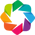

:Path   [x,y]

In [33]:
grid.plot(title="Default Grid Plot Method", height=350, width=700)

### Exercise 4: Face Area Calculations

This section covers the different area calculation options provided by `uxarray`.
Note, this is a only subset of the available options.


#### 💻 Your turn:

Calculate the total face area for the grid.

- Documentation: https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.Grid.calculate_total_face_area.html
- Hint: Use `.calculate_total_face_area()`


In [ ]:
# Your code here. When ready, click on the three dots below for the solution.

In [ ]:
t4_area = grid.calculate_total_face_area()
t4_area

#### 💻 Your turn:

Calculate the total face area using the Quadrature Rule and Order of 4.

- Documentation: https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.Grid.calculate_total_face_area.html
- Hint: Use `.calculate_total_face_area()`

Order:

```
   1 to 10              for gaussian
   1, 4, 8, 10 and 12   for triangular
```


In [ ]:
# Your code here. When ready, click on the three dots below for the solution.

In [ ]:
t1_area = grid.calculate_total_face_area(quadrature_rule="triangular", order=1)

#### 💻 Your turn:

View the individual face areas using `Grid.face_areas`.

- Documentation: https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.Grid.face_areas.html


In [ ]:
# Your code here. When ready, click on the three dots below for the solution.

In [ ]:
grid.face_areas

#### 💻 Your turn:

Calculate the area using `Grid.compute_face_areas()` and get the sum of all the face areas.
Make sure the `quadrature_rule="gaussian"` and `order=4`.

- Documentation: https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.Grid.compute_face_areas.html
- Hint: `compute_face_areas()` returns two arrays: 1. area of all faces in the mesh and 2. jacobian of all the faces in the mesh. You only need the first array, then call `sum()` on it.


In [ ]:
# Your code here. When ready, click on the three dots below for the solution.

In [ ]:
all_face_areas, all_face_jacobians = grid.compute_face_areas(
    quadrature_rule="gaussian", order=4
)
g4_area = all_face_areas.sum()
g4_area

Now we compare the values with actual know value and report error for each of the three cases above.

Just execute the cell below to view the outputs.


In [ ]:
actual_area = 4 * np.pi
diff_t4_area = np.abs(t4_area - actual_area)
diff_t1_area = np.abs(t1_area - actual_area)
diff_g4_area = np.abs(g4_area - actual_area)

diff_t1_area, diff_t4_area, diff_g4_area

## Visualizing E3SM Data as Polygons

Polygon plotting is the primary method for visualizing face-centered data variables in UXarray.

 <div class="alert alert-block alert-info">
<b>Info:</b> UXarray’s Plotting API is built around the <a href="https://holoviews.org/">Holoviews</a> package. For details about customization and accepted parameters, pleases refer to their documentation.
</div>


#### 💻 Your turn:

Visualize the first time coordinate of the `"TREFHT"` variable using polygons,
with a `line_width=0.1` and `title="Vector Polygon Plot`".

- Documentation: https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.UxDataArray.plot.polygons.html
- Hint: Use `isel` with the time label, and `plot.polygons`.


In [13]:
# Your code here. When ready, click on the three dots below for the solution.

In [ ]:
uxds["TREFHT"].isel(time=0).plot.polygons(line_width=0.1, title="Vector Polygon Plot")

### Excluding Antimeridian

For larger datasets, its suggested to keep exclude_antimeridian=True as a parameter. This will exclude polygons that would require expensive recomputations for splitting along the antimeridian.


#### 💻 Your turn:

Exclude the antimeridian for the same plot as above.

- Documentation: https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.UxDataArray.plot.polygons.html


In [14]:
# Your code here. When ready, click on the three dots below for the solution.

In [ ]:
uxds["TREFHT"].isel(time=0).plot.polygons(
    line_width=0.1,
    title="Vector Polygon Plot (Excluding Antimeridian)",
    exclude_antimeridian=True,
)

### Rasterized Polygon Plots


#### 💻 Your turn:

Generate the rasterized version of the polygon plot.

- Documentation: https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.UxDataArray.plot.rasterize.html
- Hint: Use `plot.rasterize` with a `method="polygon"` and `"Raster Polygon Plot"`.


In [ ]:
# Your code here. When ready, click on the three dots below for the solution.

In [ ]:
uxds["TREFHT"].isel(time=0).plot.rasterize(
    method="polygon", title="Raster Polygon Plot"
)

In [ ]:
gdf = uxds["TREFHT"].isel(time=0).to_geodataframe(exclude_antimeridian=False)

## Interoperability with xCDAT

Since `ux.UxDataset` and `ux.UxDataArray` extend the `xr.Dataset` and `xr.DataArray` classes,
_most_ xCDAT APIs are interoperable with UXarray objects.

- The exception is xCDAT's [spatial averager](https://xcdat.readthedocs.io/en/latest/generated/xarray.Dataset.spatial.average.html), which requires data on rectilinear grids. The data must first be remapped from unstructured to rectilinear grid using another tool like `nco`.
- There are plans to support unstructured to structured regridding in UXarray in the future.

Resources:

- [xCDAT Documentation Homepage](https://xcdat.readthedocs.io/en/stable/)
- [xCDAT API Reference Guide](https://xcdat.readthedocs.io/en/stable/api.html)

## Next Steps

Feel free to jump over to the `xcdat_practicum_notebook.ipynb` to work with `nco` and `xcdat`.
